In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import math
import operator

In [3]:
pd.options.display.max_colwidth = 250

In [4]:
!pip install sentence_transformers

     |████████████████████████████████| 78 kB 3.8 MB/s 
     |████████████████████████████████| 3.4 MB 30.8 MB/s 
     |████████████████████████████████| 6.8 MB 25.4 MB/s 
     |████████████████████████████████| 1.2 MB 47.4 MB/s 
     |████████████████████████████████| 61 kB 549 kB/s 
     |████████████████████████████████| 596 kB 46.1 MB/s 
     |████████████████████████████████| 895 kB 47.8 MB/s 
     |████████████████████████████████| 3.3 MB 32.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=79df9ac5ce3ecfb362e45bab5669dc8df77cdb05ec322c817546e1837facc9eb
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [5]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-mpnet-base-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [6]:
sentences = []

for chapter in range(1, 19):

  # analyzing chapters in which number of verses match across translations
  if chapter==1 or chapter==2 or chapter==4 or chapter==6 or chapter==13 or chapter==14 or chapter==18:      
    continue

  eknath_easwaran_chapter = pd.read_csv('/content/drive/MyDrive/religious_texts/eknath easwaran/predicted sentiment/chapter ' + str(chapter))
  mahatma_gandhi_chapter = pd.read_csv('/content/drive/MyDrive/religious_texts/mahatma gandhi/predicted sentiment/chapter ' + str(chapter))
  purohit_swami_chapter = pd.read_csv('/content/drive/MyDrive/religious_texts/purohit swami/predicted sentiment/chapter ' + str(chapter))

  sentence1 = eknath_easwaran_chapter['Tweet'].tolist()
  sentence2 = mahatma_gandhi_chapter['Tweet'].tolist()
  sentence3 = purohit_swami_chapter['Tweet'].tolist()

  sentences.append(sentence1)
  sentences.append(sentence2)
  sentences.append(sentence3)

  # print('Chapter - ', str(chapter), ' ', len(eknath_easwaran_chapter))

sentence_new = []
for i in range(0, len(sentences)):
  for j in range(0, len(sentences[i])):
    sentence_new.append(sentences[i][j])

sentence_embeddings = model.encode(sentence_new)

In [ ]:
sentence_embeddings.shape

(1059, 768)

In [ ]:
df = pd.DataFrame(columns=['Chapter', 'Verse', 'Eknath Easwaran','Mahatma Gandhi','Shri Swami Purohit','Easwaran - Gandhi','Gandhi - Purohit','Purohit - Easwaran'])

In [ ]:
i = 0
j = 43
k = 86
verse = 1

for i in range(0, 43):

  easwaran_gandhi = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  gandhi_purohit = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  purohit_easwaran = cosine_similarity([sentence_embeddings[k]], [sentence_embeddings[i]])[0][0]

  dict1 = {'Chapter': [3], 'Verse': verse, 'Eknath Easwaran': [sentence_new[i]], 'Mahatma Gandhi': [sentence_new[j]], 'Shri Swami Purohit': [sentence_new[k]],
                'Easwaran - Gandhi': [easwaran_gandhi], 'Gandhi - Purohit': [gandhi_purohit], 'Purohit - Easwaran': [purohit_easwaran]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new = pd.DataFrame(dict1)
  df = pd.concat([df, df_new], ignore_index = True)

# print(sentence_new[0])
# print(sentence_new[43])
# print(sentence_new[86])
# print('\n')

df.tail()

In [ ]:
# print(sentence_new[129])
# print(sentence_new[158])
# print(sentence_new[187])
# print('\n')

i = 129
j = 158
k = 187
verse = 1

for i in range(129, 158):

  easwaran_gandhi = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  gandhi_purohit = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  purohit_easwaran = cosine_similarity([sentence_embeddings[k]], [sentence_embeddings[i]])[0][0]

  dict1 = {'Chapter': [5], 'Verse': verse, 'Eknath Easwaran': [sentence_new[i]], 'Mahatma Gandhi': [sentence_new[j]], 'Shri Swami Purohit': [sentence_new[k]],
                'Easwaran - Gandhi': [easwaran_gandhi], 'Gandhi - Purohit': [gandhi_purohit], 'Purohit - Easwaran': [purohit_easwaran]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new = pd.DataFrame(dict1)
  df = pd.concat([df, df_new], ignore_index = True)

df.tail()

In [ ]:
# print(sentence_new[216])
# print(sentence_new[246])
# print(sentence_new[276])
# print('\n')

i = 216
j = 246
k = 276
verse = 1

for i in range(216, 246):

  easwaran_gandhi = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  gandhi_purohit = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  purohit_easwaran = cosine_similarity([sentence_embeddings[k]], [sentence_embeddings[i]])[0][0]

  dict1 = {'Chapter': [7], 'Verse': verse, 'Eknath Easwaran': [sentence_new[i]], 'Mahatma Gandhi': [sentence_new[j]], 'Shri Swami Purohit': [sentence_new[k]],
                'Easwaran - Gandhi': [easwaran_gandhi], 'Gandhi - Purohit': [gandhi_purohit], 'Purohit - Easwaran': [purohit_easwaran]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new = pd.DataFrame(dict1)
  df = pd.concat([df, df_new], ignore_index = True)

df.tail()

In [ ]:
# print(sentence_new[306])
# print(sentence_new[334])
# print(sentence_new[362])
# print('\n')

i = 306
j = 334
k = 362
verse = 1

for i in range(306, 334):

  easwaran_gandhi = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  gandhi_purohit = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  purohit_easwaran = cosine_similarity([sentence_embeddings[k]], [sentence_embeddings[i]])[0][0]

  dict1 = {'Chapter': [8], 'Verse': verse, 'Eknath Easwaran': [sentence_new[i]], 'Mahatma Gandhi': [sentence_new[j]], 'Shri Swami Purohit': [sentence_new[k]],
                'Easwaran - Gandhi': [easwaran_gandhi], 'Gandhi - Purohit': [gandhi_purohit], 'Purohit - Easwaran': [purohit_easwaran]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new = pd.DataFrame(dict1)
  df = pd.concat([df, df_new], ignore_index = True)

df.tail()

In [ ]:
# print(sentence_new[390])
# print(sentence_new[424])
# print(sentence_new[458])
# print('\n')

i = 390
j = 424
k = 458
verse = 1

for i in range(390, 424):

  easwaran_gandhi = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  gandhi_purohit = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  purohit_easwaran = cosine_similarity([sentence_embeddings[k]], [sentence_embeddings[i]])[0][0]

  dict1 = {'Chapter': [9], 'Verse': verse, 'Eknath Easwaran': [sentence_new[i]], 'Mahatma Gandhi': [sentence_new[j]], 'Shri Swami Purohit': [sentence_new[k]],
                'Easwaran - Gandhi': [easwaran_gandhi], 'Gandhi - Purohit': [gandhi_purohit], 'Purohit - Easwaran': [purohit_easwaran]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new = pd.DataFrame(dict1)
  df = pd.concat([df, df_new], ignore_index = True)

df.tail()

In [ ]:
# print('Chapter 10')

# print(sentence_new[492])
# print(sentence_new[534])
# print(sentence_new[576])

i = 492
j = 534
k = 576
verse = 1

for i in range(492, 534):

  easwaran_gandhi = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  gandhi_purohit = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  purohit_easwaran = cosine_similarity([sentence_embeddings[k]], [sentence_embeddings[i]])[0][0]

  dict1 = {'Chapter': [10], 'Verse': verse, 'Eknath Easwaran': [sentence_new[i]], 'Mahatma Gandhi': [sentence_new[j]], 'Shri Swami Purohit': [sentence_new[k]],
                'Easwaran - Gandhi': [easwaran_gandhi], 'Gandhi - Purohit': [gandhi_purohit], 'Purohit - Easwaran': [purohit_easwaran]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new = pd.DataFrame(dict1)
  df = pd.concat([df, df_new], ignore_index = True)

df.tail()

In [ ]:
# print('Chapter 11')

# print(sentence_new[618])
# print(sentence_new[673])
# print(sentence_new[728])

i = 618
j = 673
k = 728
verse = 1

for i in range(618, 673):

  easwaran_gandhi = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  gandhi_purohit = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  purohit_easwaran = cosine_similarity([sentence_embeddings[k]], [sentence_embeddings[i]])[0][0]

  dict1 = {'Chapter': [11], 'Verse': verse, 'Eknath Easwaran': [sentence_new[i]], 'Mahatma Gandhi': [sentence_new[j]], 'Shri Swami Purohit': [sentence_new[k]],
                'Easwaran - Gandhi': [easwaran_gandhi], 'Gandhi - Purohit': [gandhi_purohit], 'Purohit - Easwaran': [purohit_easwaran]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new = pd.DataFrame(dict1)
  df = pd.concat([df, df_new], ignore_index = True)

df.tail()

In [ ]:
# print('Chapter 12')

# print(sentence_new[783])
# print(sentence_new[803])
# print(sentence_new[823])

i = 783
j = 803
k = 823
verse = 1

for i in range(783, 803):

  easwaran_gandhi = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  gandhi_purohit = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  purohit_easwaran = cosine_similarity([sentence_embeddings[k]], [sentence_embeddings[i]])[0][0]

  dict1 = {'Chapter': [12], 'Verse': verse, 'Eknath Easwaran': [sentence_new[i]], 'Mahatma Gandhi': [sentence_new[j]], 'Shri Swami Purohit': [sentence_new[k]],
                'Easwaran - Gandhi': [easwaran_gandhi], 'Gandhi - Purohit': [gandhi_purohit], 'Purohit - Easwaran': [purohit_easwaran]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new = pd.DataFrame(dict1)
  df = pd.concat([df, df_new], ignore_index = True)

df.tail()

In [ ]:
# Chapter 15

i = 843
j = 863
k = 883
verse = 1

for i in range(843, 863):

  easwaran_gandhi = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  gandhi_purohit = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  purohit_easwaran = cosine_similarity([sentence_embeddings[k]], [sentence_embeddings[i]])[0][0]

  dict1 = {'Chapter': [15], 'Verse': verse, 'Eknath Easwaran': [sentence_new[i]], 'Mahatma Gandhi': [sentence_new[j]], 'Shri Swami Purohit': [sentence_new[k]],
                'Easwaran - Gandhi': [easwaran_gandhi], 'Gandhi - Purohit': [gandhi_purohit], 'Purohit - Easwaran': [purohit_easwaran]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new = pd.DataFrame(dict1)
  df = pd.concat([df, df_new], ignore_index = True)

df.tail()

In [ ]:
# Chapter 16

i = 903
j = 927
k = 951
verse = 1

for i in range(903, 927):

  easwaran_gandhi = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  gandhi_purohit = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  purohit_easwaran = cosine_similarity([sentence_embeddings[k]], [sentence_embeddings[i]])[0][0]

  dict1 = {'Chapter': [16], 'Verse': verse, 'Eknath Easwaran': [sentence_new[i]], 'Mahatma Gandhi': [sentence_new[j]], 'Shri Swami Purohit': [sentence_new[k]],
                'Easwaran - Gandhi': [easwaran_gandhi], 'Gandhi - Purohit': [gandhi_purohit], 'Purohit - Easwaran': [purohit_easwaran]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new = pd.DataFrame(dict1)
  df = pd.concat([df, df_new], ignore_index = True)

df.tail()

In [ ]:
# Chapter 17

i = 975
j = 1003
k = 1031
verse = 1

for i in range(975, 1003):

  easwaran_gandhi = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])[0][0]
  gandhi_purohit = cosine_similarity([sentence_embeddings[j]], [sentence_embeddings[k]])[0][0]
  purohit_easwaran = cosine_similarity([sentence_embeddings[k]], [sentence_embeddings[i]])[0][0]

  dict1 = {'Chapter': [17], 'Verse': verse, 'Eknath Easwaran': [sentence_new[i]], 'Mahatma Gandhi': [sentence_new[j]], 'Shri Swami Purohit': [sentence_new[k]],
                'Easwaran - Gandhi': [easwaran_gandhi], 'Gandhi - Purohit': [gandhi_purohit], 'Purohit - Easwaran': [purohit_easwaran]}

  i+=1
  j+=1
  k+=1
  verse+=1

  df_new = pd.DataFrame(dict1)
  df = pd.concat([df, df_new], ignore_index = True)

df.tail()

In [ ]:
df.shape

(353, 8)

In [ ]:
df.to_csv('/content/drive/MyDrive/religious_texts/semantic analysis/all-distilroberta-v1/cosine_similarity.csv')

# Exploring Key Verses with low Cosine Similarity

In [ ]:
maximum_difference_easwaran_gandhi = df.loc[(df['Easwaran - Gandhi'] < 0.5)]
# maximum_difference_easwaran_gandhi.to_csv('/content/drive/MyDrive/religious_texts/semantic analysis/all-mpnet-base-v2/easwaran gandhi.csv')
maximum_difference_easwaran_gandhi

In [ ]:
maximum_difference = maximum_difference_easwaran_gandhi.loc[(maximum_difference_easwaran_gandhi['Gandhi - Purohit'] < 0.5) & 
                                                                  (maximum_difference_easwaran_gandhi['Purohit - Easwaran'] < 0.5)]

maximum_difference

In [ ]:
maximum_difference_easwaran_gandhi.shape

(38, 8)

In [ ]:
maximum_difference_gandhi_purohit = df.loc[(df['Gandhi - Purohit'] < 0.6)]
# maximum_difference_gandhi_purohit.to_csv('/content/drive/MyDrive/religious_texts/semantic analysis/all-mpnet-base-v2/gandhi purohit.csv')
maximum_difference_gandhi_purohit

In [ ]:
maximum_difference_purohit_easwaran = df.loc[(df['Purohit - Easwaran'] < 0.7)]
maximum_difference_purohit_easwaran.to_csv('/content/drive/MyDrive/religious_texts/semantic analysis/purohit easwaran.csv')

In [ ]:
df.to_csv('/content/drive/MyDrive/religious_texts/semantic analysis/cosine similarity - sklearn.csv')

In [ ]:
sentence_embeddings.shape

(1059, 768)

# Most Similar Verses

In [ ]:
df.head(2)

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran
0,3,1,"ARJUNA: O Krishna, you have said that knowledge is greater than action; why then do you ask me to wage this terrible war?","If, O Krishna, you hold that the attitude of detachment is superior to action, then why, O Krishna, do you urge me to dreadful action?","“Arjuna questioned: My Lord! If Wisdom is above action, why do You advise me to engage in this terrible fight?",0.549583,0.567935,0.855622
1,3,2,Your advice seems inconsistent. Give me one path to follow to the supreme good.,"You do seem to confuse my understanding with perplexing speech; tell me, therefore, in no uncertain voice, that alone whereby I may attain salvation. The Lord Said:","Your language perplexes me and confuses my reason. Therefore please tell me the only way by which I may, without doubt, secure my spiritual welfare.",0.386773,0.597958,0.563253


In [ ]:
df['total'] = df['Easwaran - Gandhi'] + df['Gandhi - Purohit'] + df['Purohit - Easwaran']
df.head(2)

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran,total
0,3,1,"ARJUNA: O Krishna, you have said that knowledge is greater than action; why then do you ask me to wage this terrible war?","If, O Krishna, you hold that the attitude of detachment is superior to action, then why, O Krishna, do you urge me to dreadful action?","“Arjuna questioned: My Lord! If Wisdom is above action, why do You advise me to engage in this terrible fight?",0.549583,0.567935,0.855622,1.973140
1,3,2,Your advice seems inconsistent. Give me one path to follow to the supreme good.,"You do seem to confuse my understanding with perplexing speech; tell me, therefore, in no uncertain voice, that alone whereby I may attain salvation. The Lord Said:","Your language perplexes me and confuses my reason. Therefore please tell me the only way by which I may, without doubt, secure my spiritual welfare.",0.386773,0.597958,0.563253,1.547984


In [ ]:
df['max sum'] = df.groupby(['Chapter'])['total'].transform('max')
df.head(2)

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran,total,max sum
0,3,1,"ARJUNA: O Krishna, you have said that knowledge is greater than action; why then do you ask me to wage this terrible war?","If, O Krishna, you hold that the attitude of detachment is superior to action, then why, O Krishna, do you urge me to dreadful action?","“Arjuna questioned: My Lord! If Wisdom is above action, why do You advise me to engage in this terrible fight?",0.549583,0.567935,0.855622,1.973140,2.470498
1,3,2,Your advice seems inconsistent. Give me one path to follow to the supreme good.,"You do seem to confuse my understanding with perplexing speech; tell me, therefore, in no uncertain voice, that alone whereby I may attain salvation. The Lord Said:","Your language perplexes me and confuses my reason. Therefore please tell me the only way by which I may, without doubt, secure my spiritual welfare.",0.386773,0.597958,0.563253,1.547984,2.470498


In [ ]:
df_max_sum = df.loc[(df['max sum'] == df['total'])]
df_max_sum

# df_least_sum.to_csv('/content/drive/MyDrive/religious_texts/semantic analysis/all-distilroberta-v1/least_sum_in_every_chapter.csv')

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran,total,max sum
3,3,4,One who shirks action does not attain freedom; no one can gain perfection by abstaining from work.,"Never does man enjoy freedom from action by not undertaking action, nor does he attain that freedom by mere renunciation of action.",No man can attain freedom from activity by refraining from action; nor can he reach perfection by merely refusing to act.,0.753292,0.879323,0.837883,2.470498,2.470498
55,5,13,"Those who renounce attachment in all their deeds live content in the city of nine gates, the body, as its master. They are not driven to act, nor do they involve others in action.","Renouncing with the mind all actions, the dweller in the body, who is master of himself, rests happily in his city of nine gates, neither doing nor getting anything done.","Mentally renouncing all actions, the self-controlled soul enjoys bliss in this body, the city of the nine gates, neither doing anything himself nor causing anything to be done.",0.794593,0.874468,0.710194,2.379256,2.379256
80,7,9,I am the sweet fragrance in the earth and the radiance of fire; I am the life in every creature and the striving of the spiritual aspirant.,I am the sweet fragrance in earth; the brilliance in fire; the life in all beings; and the austerity in ascetics.,"I am the Fragrance of earth, the Brilliance of fire. I am the Life Force in all beings, and I am the Austerity of the ascetics.",0.908720,0.917388,0.856513,2.682621,2.682621
127,8,26,"These two paths, the light and the dark, are said to be eternal, leading some to liberation and others to rebirth.","These two paths—bright and dark—are deemed to be the eternal paths of the world; by the one a man goes to return not, by the other he returns again.","These bright and dark paths out of the world have always existed. Whoso takes the former, returns not; he who chooses the latter, returns.",0.836543,0.825362,0.742681,2.404586,2.404586
147,9,18,"I am the goal of life, the Lord and support of all, the inner witness, the abode of all. I am the only refuge, the one true friend; I am the beginning, the staying, and the end of creation; I am the womb and the eternal seed.","I am the Goal, the Sustainer, the Lord, the Witness, the Abode, the Refuge, the Friend; the Origin, the End the Preservation, the Treasure house, the Imperishable Seed.","I am the Goal, the Sustainer, the Lord, the Witness, the Home, the Shelter, the Lover and the Origin; I am Life and Death; I am the Fountain and the Seed Imperishable.",0.839349,0.907831,0.871312,2.618492,2.618492
189,10,26,"Among trees I am the ashvattha, the sacred fig; among the gandharvas, the heavenly musicians, I am Chitraratha. Among divine seers I am Narada, and among sages I am Kapila.","Of all trees I am Ashvattha; of the divine seers, Narada; of the heavenly choir I am Chitraratha; of the perfected I am Kapila the ascetic.","Of trees I am the sacred Fig-tree, of the Divine Seers Narada, of the heavenly singers I am Chitraratha, their Leader, and of sages I am Kapila.",0.899798,0.877354,0.906407,2.683559,2.683559
221,11,16,"I see infinite mouths and arms, stomachs and eyes, and you are embodied in every form. I see you everywhere, without beginning, middle, or end. You are the Lord of all creation, and the cosmos is your body.","With many arms and bellies, mouths and eyes, I see Your infinite form everywhere. Neither Your end, nor middle, nor beginning, do I see, O Lord of the Universe, Universal-formed!","I see You, infinite in form, with, as it were, faces, eyes and limbs everywhere; no beginning, no middle, no end; O You Lord of the Universe, Whose Form is universal!",0.845025,0.918711,0.852058,2.615794,2.615794
278,12,18,"That devotee who looks upon friend and foe with equal regard, who is not buoyed up by praise nor cast down by blame, alike in heat and cold, pleasure and pain, free from selfish attachments,","Who is same to 

In [ ]:
df_max_sum.to_csv('/content/drive/MyDrive/religious_texts/semantic analysis/all-mpnet-base-v2/max_sum_in_every_chapter.csv')

# Least Similar Verses

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/religious_texts/semantic analysis/all-mpnet-base-v2/cosine_similarity.csv')

df.drop(['Unnamed: 0'], axis=1, inplace=True)
df = df.loc[(df.Chapter ==12)]
df

print('Easwaran - Gandhi mean - ', df['Easwaran - Gandhi'].mean())
print('Easwaran - Gandhi std - ', df['Easwaran - Gandhi'].std())
print('\n')

print('Gandhi - Purohit mean - ', df['Gandhi - Purohit'].mean())
print('Gandhi - Purohit std - ', df['Gandhi - Purohit'].std())
print('\n')

print('Purohit - Easwaran mean - ', df['Purohit - Easwaran'].mean())
print('Purohit - Easwaran std - ', df['Purohit - Easwaran'].std())



Easwaran - Gandhi mean -  0.6094048276543618
Easwaran - Gandhi std -  0.12085424264470612


Gandhi - Purohit mean -  0.7241260886192322
Gandhi - Purohit std -  0.09631171717183215


Purohit - Easwaran mean -  0.6331344723701477
Purohit - Easwaran std -  0.09720870538108449


In [ ]:
df['total'] = df['Easwaran - Gandhi'] + df['Gandhi - Purohit'] + df['Purohit - Easwaran']

df.head()

In [ ]:
df['min sum'] = df.groupby(['Chapter'])['total'].transform('min')

df.head()

In [ ]:
df_least_sum = df.loc[(df['min sum'] == df['total'])]

df_least_sum.to_csv('/content/drive/MyDrive/religious_texts/semantic analysis/all-distilroberta-v1/least_sum_in_every_chapter.csv')

In [ ]:
df_least_sum

In [ ]:
maximum_difference = df.loc[(df['Easwaran - Gandhi']<0.5) & (df['Gandhi - Purohit'] < 0.5) & (df['Purohit - Easwaran'] < 0.5)]
maximum_difference

,Chapter,Verse,Eknath Easwaran,Mahatma Gandhi,Shri Swami Purohit,Easwaran - Gandhi,Gandhi - Purohit,Purohit - Easwaran
39,3,40,"Selfish desire is found in the senses, mind, and intellect, misleading them and burying the understanding in delusion.","The senses, the mind and the reason are said to be its great seat; by means of these it obscures knowledge and stupefies man.","It works through the senses, the mind and the reason; and with their help destroys wisdom and confounds the soul.",0.437966,0.492521,0.298986


# Average Cosine Similarity in a Chapter

In [ ]:
df_mean_easwaran_gandhi = df.groupby('Chapter')['Easwaran - Gandhi'].mean().reset_index()
df_mean_gandhi_purohit = df.groupby('Chapter')['Gandhi - Purohit'].mean().reset_index()
df_mean_purohit_easwaran = df.groupby('Chapter')['Purohit - Easwaran'].mean().reset_index()

df_std_easwaran_gandhi = df.groupby('Chapter')['Easwaran - Gandhi'].std().reset_index()
df_std_gandhi_purohit = df.groupby('Chapter')['Gandhi - Purohit'].std().reset_index()
df_std_purohit_easwaran = df.groupby('Chapter')['Purohit - Easwaran'].std().reset_index()


In [ ]:
df_std_easwaran_gandhi

,Chapter,Easwaran - Gandhi
0,3,0.133417
1,5,0.129454
2,7,0.144206
3,8,0.123758
4,9,0.126661
5,10,0.096271
6,11,0.109367
7,12,0.120854
8,15,0.116626
9,16,0.096358


In [ ]:
df_std_purohit_easwaran

,Chapter,Purohit - Easwaran
0,3,0.146720
1,5,0.105294
2,7,0.147529
3,8,0.081865
4,9,0.109558
5,10,0.113377
6,11,0.101416
7,12,0.097209
8,15,0.110526
9,16,0.100979


In [ ]:
df_std_gandhi_purohit

,Chapter,Gandhi - Purohit
0,3,0.114929
1,5,0.122192
2,7,0.148235
3,8,0.124033
4,9,0.094711
5,10,0.123993
6,11,0.110552
7,12,0.096312
8,15,0.067678
9,16,0.116127


In [ ]:
df_mean_easwaran_gandhi

,Chapter,Easwaran - Gandhi
0,3,0.626667
1,5,0.629483
2,7,0.697946
3,8,0.661864
4,9,0.680898
5,10,0.759541
6,11,0.705493
7,12,0.609405
8,15,0.686798
9,16,0.662446


In [ ]:
df_mean_purohit_easwaran

,Chapter,Purohit - Easwaran
0,3,0.608486
1,5,0.637345
2,7,0.668147
3,8,0.650818
4,9,0.686254
5,10,0.747596
6,11,0.731990
7,12,0.633134
8,15,0.675277
9,16,0.667652


In [ ]:
df_mean_gandhi_purohit

,Chapter,Gandhi - Purohit
0,3,0.694644
1,5,0.628022
2,7,0.691868
3,8,0.673482
4,9,0.731068
5,10,0.733444
6,11,0.721148
7,12,0.724126
8,15,0.657875
9,16,0.691161


In [ ]:
df_std_easwaran_gandhi['Easwaran - Gandhi'].mean()

0.11897631311721649

In [ ]:
df_std_purohit_easwaran['Purohit - Easwaran'].mean()

0.11338142832963212

In [ ]:
df_std_gandhi_purohit['Gandhi - Purohit'].mean()

0.1137847697960476

# Keyword Extraction using KeyBERT

In [ ]:
!pip install keybert
from keybert import KeyBERT

     |████████████████████████████████| 214 kB 5.3 MB/s 
     |████████████████████████████████| 51 kB 6.9 MB/s 
  Created wheel for keybert: filename=keybert-0.5.0-py3-none-any.whl size=20491 sha256=a6007604a6977a08a7eea66fcc63ad525898356f5bffd9dd1a3f34bc2fb7d75e
  Stored in directory: /root/.cache/pip/wheels/99/1f/3f/590d2997adbb2d0e1f82e8ee05d42d6910e92c3ed283015ff8
Successfully built keybert


In [ ]:
kw_model = KeyBERT(model = 'all-mpnet-base-v2')

In [ ]:
####### METHODOLOGY FOR OBTAINING KEYWORDS

# We encode verses using the MPNet-base model to compute the verse by verse semantic similarity. 
# We use the MPNet-base model for extraction of keywords (using KeyBERT) from all chapters. 
# However, given the constraint in the MPNet-base model that number of tokens should not exceed 384, it would not be possible to encode large chapters directly. 
# Hence, we propose a method to overcome this limitation by breaking each chapter into paragraphs of 15 verses. 
# We include 3 verses from the previous paragraph into the current paragraph to retain some context and maintain continuity. 
# For example, in the first paragraph, verses 1-15 are included, and in the second paragraph verses 13-27, then 25-39, and so on.  
# We keep the top 20 keywords because keywords that have a lower similarity score in the original paragraph may be more relevant when the entire paragraph is considered.
 
# Next, we extract the keywords for all paragraphs i with 20 candidate keywords of paragraph j such that i!=j. 
# For each keyword, we add up its cosine similarity score across paragraphs. 
# Finally, we obtain the top 10 keywords having the highest cumulative scores. 
# The key idea here is that if a term is a keyword in a certain paragraph, it also needs to be sufficiently close to other paragraphs in the higher dimensional vector space
# to qualify as a keyword for the entire chapter. 
# We use MMR with a diversity value of 0.5 to prevent the selection of similar meaning keywords.


top_n = 20
final_df = pd.DataFrame()

for chapter in range(1, 19):
  df = pd.read_csv('/content/drive/MyDrive/religious_texts/mahatma gandhi/predicted sentiment/chapter ' + str(chapter))
  df = df.drop(['Unnamed: 0', 'Official report'], axis=1)

  score_list = []
  text_list = []
  string_list = []
  keyword_score_map = {}
  keyword_count_map = {}

  for i in range(math.ceil(df.shape[0]/15)):

    if i==0:
      text = ' '.join(df[0:15].Tweet)

    else:
      if df.shape[0] >= 15*(i+1) - 3:
        text = ' '.join(df[(15*i - 3):(15*(i+1)-3)].Tweet)

      else:
        text = ' '.join(df[(15*i-3):df.shape[0]].Tweet)

    list1 = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words='english', top_n = top_n, use_mmr=True, diversity=0.5)
    score_list.append(list1)
    text_list.append(text)

    # print(text)
    # print(list1)

    for jj in range(0, top_n):
      # print('keyword - score ', score_list[0][jj])
      # print('keyword ', score_list[0][jj][0])
      # print('score ', score_list[0][jj][1])

      keyword = score_list[0][jj][0]
      string_list.append(keyword)
      keyword_score_map[keyword] = 0
      keyword_count_map[keyword] = 0

  for ii in range(math.ceil(df.shape[0]/15)):
    for jj in range(math.ceil(df.shape[0]/15)):
      # if chapter==12 or chapter==15 or ii!=jj:

        list2 = kw_model.extract_keywords(text_list[jj], candidates=string_list[top_n*ii : top_n*(ii+1)], keyphrase_ngram_range=(1, 1), stop_words='english', top_n = top_n,
                                          use_mmr=True, diversity=0.3)
        for kk in range(0, top_n):
          keyword = list2[kk][0]
          keyword_score = list2[kk][1]
          keyword_score_map[keyword]+=keyword_score
          keyword_count_map[keyword]+=1


  keyword_score_map = dict( sorted(keyword_score_map.items(), key=operator.itemgetter(1),reverse=True))      # sort in descending order according to scores
  keyword_df = pd.DataFrame(keyword_score_map.items(), columns=['Keyword', 'Score'])                         # convert dictionary to dataframe
  keyword_df = keyword_df[:10]                                                                               # TOP 10 KEYWORDS most relevant to text 
  keyword_df['Chapter'] = chapter
  keyword_df['Author'] = 'Mahatma Gandhi'

  final_df = pd.concat([final_df, keyword_df], axis=0)

final_df

,Keyword,Score,Chapter,Author
0,arjuna,7.5604,1,Mahatma Gandhi
1,maharatha,5.7888,1,Mahatma Gandhi
2,battle,5.3656,1,Mahatma Gandhi
3,bhima,4.0908,1,Mahatma Gandhi
4,devadatta,4.0588,1,Mahatma Gandhi
...,...,...,...,...
5,abandons,10.2162,18,Mahatma Gandhi
6,tamasa,9.5550,18,Mahatma Gandhi
7,undertakes,9.1416,18,Mahatma Gandhi
8,desire,8.9142,18,Mahatma Gandhi


In [ ]:
final_df.to_csv('/content/drive/MyDrive/religious_texts/semantic analysis/KeyBERT/Batches of 15 verses/Stopwords removed + MMR/(D=0.3)/mahatma_gandhi.csv')

In [ ]:
chapter_12 = final_df.loc[(final_df['Chapter'] == 15)]
chapter_12

,Keyword,Score,Chapter,Author
0,krishna,0.0,15,Eknath Easwaran
1,ashvattha,0.0,15,Eknath Easwaran
2,eternal,0.0,15,Eknath Easwaran
3,essence,0.0,15,Eknath Easwaran
4,wisdom,0.0,15,Eknath Easwaran
5,tree,0.0,15,Eknath Easwaran
6,immutable,0.0,15,Eknath Easwaran
7,scriptures,0.0,15,Eknath Easwaran
8,spirit,0.0,15,Eknath Easwaran
9,worship,0.0,15,Eknath Easwaran


In [ ]:
keyword_score_map = dict( sorted(keyword_score_map.items(), key=operator.itemgetter(1),reverse=True))

In [ ]:
df = pd.DataFrame(keyword_score_map.items(), columns=['Keyword', 'Score'])

In [ ]:
df[:10]

,Keyword,Score
0,arjuna,4.5015
1,sorrow,4.2120
2,krishna,3.7293
3,immortality,3.3804
4,arise,3.1596
5,death,3.1425
6,despair,3.0570
7,disciple,2.8830
8,slain,2.8695
9,reverence,2.8506


# Experiments

In [ ]:
import numpy as np
from tqdm import tqdm
from typing import List, Union, Tuple
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

!pip install keybert
from keybert import KeyBERT
# KeyBERT
from keybert._mmr import mmr
from keybert._maxsum import max_sum_similarity
from keybert._highlight import highlight_document
from keybert.backend._utils import select_backend

     |████████████████████████████████| 78 kB 3.5 MB/s 
     |████████████████████████████████| 214 kB 11.9 MB/s 
     |████████████████████████████████| 51 kB 6.2 MB/s 
     |████████████████████████████████| 3.4 MB 31.3 MB/s 
     |████████████████████████████████| 3.3 MB 22.3 MB/s 
     |████████████████████████████████| 1.2 MB 9.7 MB/s 
     |████████████████████████████████| 61 kB 462 kB/s 
     |████████████████████████████████| 596 kB 39.8 MB/s 
     |████████████████████████████████| 895 kB 49.9 MB/s 
  Created wheel for keybert: filename=keybert-0.5.0-py3-none-any.whl size=20491 sha256=1d4b20f3b1d66921c9312d5ab8d24bb480960fe6ab1e3a56bffe14c9f8defeb5
  Stored in directory: /root/.cache/pip/wheels/99/1f/3f/590d2997adbb2d0e1f82e8ee05d42d6910e92c3ed283015ff8
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=273083dec2588ba0a10306c5c333a49d988679a372cb3ab6f43370f081d58a74
  Stored in directory: /root/.cache/pip/wheel

In [ ]:
model = KeyBERT(model = 'all-mpnet-base-v2')

# doc_embedding = model.embed([doc2])
# candidate_embeddings = model.embed(candidates)

In [ ]:
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 384, 'do_lower_case': False}) with Transformer model: MPNetModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/religious_texts/semantic analysis/KeyBERT/Batches of 15 verses/Stopwords removed + MMR/(D=0.5)/shri_purohit_swami.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.drop_duplicates(subset='Keyword', keep='last', inplace=True)
df

,Keyword,Score,Chapter,Author
2,duryodhana,4.2736,1,Shri Purohit Swami
3,generals,3.7944,1,Shri Purohit Swami
4,chariot,3.7908,1,Shri Purohit Swami
5,bowmen,3.6540,1,Shri Purohit Swami
6,valiant,3.4804,1,Shri Purohit Swami
...,...,...,...,...
175,relinquishment,10.1544,18,Shri Purohit Swami
176,desire,8.8344,18,Shri Purohit Swami
177,renounce,7.8690,18,Shri Purohit Swami
178,forgoing,7.2534,18,Shri Purohit Swami


In [ ]:
candidates = df['Keyword'].tolist()

In [ ]:
candidates

['duryodhana',
 'generals',
 'chariot',
 'bowmen',
 'valiant',
 'die',
 'trumpets',
 'commanded',
 'compassion',
 'endure',
 'battle',
 'kill',
 'profess',
 'bheeshma',
 'away',
 'refraining',
 'consciously',
 'duty',
 'yoga',
 'nourish',
 'reincarnate',
 'materialism',
 'changeless',
 'ancestors',
 'births',
 'meditating',
 'praise',
 'divine',
 'sin',
 'perceives',
 'spirituality',
 'meditation',
 'celibacy',
 'purification',
 'renounces',
 'virtuous',
 'vow',
 'sage',
 'spiritual',
 'righteousness',
 'natures',
 'unto',
 'consciousness',
 'eternity',
 'mysticism',
 'souls',
 'multitude',
 'immovable',
 'beings',
 'mankind',
 'holiest',
 'progenitors',
 'contentment',
 'omnipresent',
 'universe',
 'behold',
 'embraced',
 'radiance',
 'powers',
 'petal',
 'devotee',
 'worship',
 'meditate',
 'verily',
 'realise',
 'attention',
 'devotion',
 'vitality',
 'perception',
 'omniscient',
 'nature',
 'matter',
 'indolence',
 'divinity',
 'sinless',
 'infatuation',
 'spirit',
 'reborn',
 'kno

In [ ]:
candidate_embeddings = model.encode(candidates)

In [ ]:
print(len(candidate_embeddings))
print(len(candidate_embeddings[0]))


113
768


In [ ]:
candidate_embeddings = pd.DataFrame(candidate_embeddings)
candidate_embeddings.to_csv('/content/drive/MyDrive/religious_texts/experiments/shri_purohit_keywords3.tsv', sep='\t', index=None, header=None)

In [ ]:
df.to_csv('/content/drive/MyDrive/religious_texts/experiments/shri_purohit_swami_keywords_metadata3.tsv', sep='\t', index=None)

In [ ]:
import numpy as np
!pip install scikit-learn==0.21.3
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold.t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 2)

In [ ]:
tsne = TSNE(perplexity=30)
X_embedded = tsne.fit_transform(candidate_embeddings)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


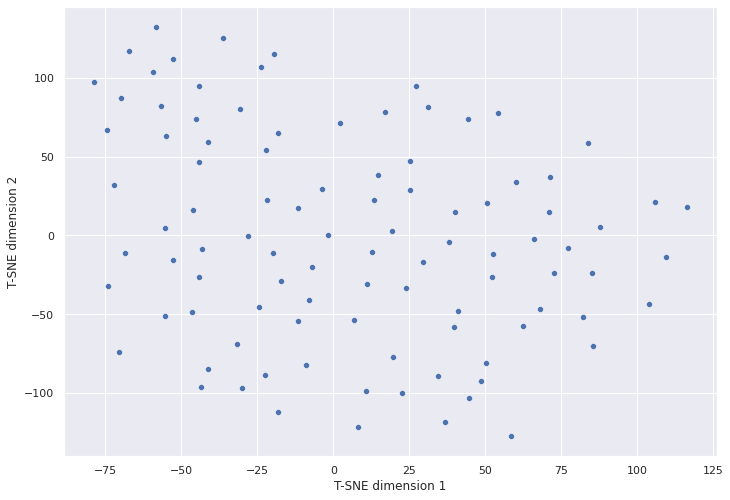

In [ ]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], legend='full')
plt.xlabel(xlabel='T-SNE dimension 1')
plt.ylabel(ylabel='T-SNE dimension 2')

plt.show()